## Problem Statement
Extract reviews of any product from ecommerce website like amazon<br>
Perform emotion mining

### Scrapping Product Reviews from Amazon

Web scraping is the process of using bots to extract content and data from a website. Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
search_query="puma+shoes+men"

In [3]:
base_url="https://www.amazon.com/s?k"

In [4]:
url=base_url+search_query
url

'https://www.amazon.com/s?kpuma+shoes+men'

In [5]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36',
        'referer':'https://www.amazon.com/s?k=puma+shoes+men&crid=1RGK4ZIXI9E9A&sprefix=pu+shoes+men%2Caps%2C1172&ref=nb_sb_noss_2'}

In [6]:
search_response=requests.get(url,headers=header)

In [7]:
search_response.status_code

200

In [8]:
search_response.text

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

In [9]:
search_response.cookies

<RequestsCookieJar[Cookie(version=0, name='skin', value='noskin', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='ubid-main', value='131-0227185-4259321', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1709706948, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

### Function to get the content of the page of required query 

In [10]:
cookie={} #insert request cookies within{}

def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

### Function to get the contents of individual product pages using ‘data-asin’ number (unique identification number)

Data asin number is a unique number for every single product listed on amazon. Using this number and adding to base url we can go to every single product page and scrape data, so this is the main point of all this script.

In [11]:
def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

### Function to pass on the link of ‘see all reviews’ and extract the content

This function will help us to go to all products using asin number and then grab the links for `see all reviews` 

In [12]:
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

### Now let’s grab the asin number of all products and save it into a list

In [13]:
data_asin=[]
response=getAmazonSearch('puma+shoes+men')
soup=BeautifulSoup(response.content)
for a in soup.findAll("div",{'class':"sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20"}):
    data_asin.append(a['data-asin'])

https://www.amazon.com/s?k=puma+shoes+men


In [14]:
response.status_code

200

In [15]:
data_asin

['B0721LTNKQ',
 'B08KLFFVN2',
 'B01C3LK84G',
 'B005OLAKG4',
 'B079M6TMTJ',
 'B07TLQHJ51',
 'B06XW1VLK7',
 'B08QCKN313',
 'B08QCWR8YY',
 'B09MGFWMQW',
 'B07FNZ84ZX',
 'B08R1PQSN2',
 'B08KKYHXW3',
 'B08KL8GSJS',
 'B09LTRS2TK',
 'B08QCN2DCC',
 'B09MZ27R86',
 'B07543JXW2',
 'B08KK92KQB',
 'B08QCNZRFK',
 'B07GR89JDV',
 'B09MZ1W7TQ',
 'B07QP59CNG',
 'B09W5WC8BV',
 'B08R1RCGWK',
 'B08QC9GL9B',
 'B07FZZ7DJ4',
 'B0058XLRXS',
 'B0B7CQ5XC1',
 'B08R1MDYTX',
 'B097KJHJG3',
 'B0BBSK5GHS',
 'B09S2B4GXF',
 'B08R1MZ4ZC',
 'B0982JRQF4',
 'B0B7CNFP51',
 'B085HJNZWY',
 'B0BSL1PCV9',
 'B08QCW5KLX',
 'B097KK3G49',
 'B09S25WS68',
 'B0BT74NLMJ',
 'B09MZ1D811',
 'B09S22BCVB',
 'B08KLQRKBM',
 'B09S2HKTCQ',
 'B09NS6BP45',
 'B08R5M4C3K']

In [16]:
len(data_asin)

48

### Passing the data-asin numbers, we can extract the ‘see all reviews’ link for each product in the page

In [17]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/dp/B0721LTNKQ
https://www.amazon.com/dp/B08KLFFVN2
https://www.amazon.com/dp/B01C3LK84G
https://www.amazon.com/dp/B005OLAKG4
https://www.amazon.com/dp/B079M6TMTJ
https://www.amazon.com/dp/B07TLQHJ51
https://www.amazon.com/dp/B06XW1VLK7
https://www.amazon.com/dp/B08QCKN313
https://www.amazon.com/dp/B08QCWR8YY
https://www.amazon.com/dp/B09MGFWMQW
https://www.amazon.com/dp/B07FNZ84ZX
https://www.amazon.com/dp/B08R1PQSN2
https://www.amazon.com/dp/B08KKYHXW3
https://www.amazon.com/dp/B08KL8GSJS
https://www.amazon.com/dp/B09LTRS2TK
https://www.amazon.com/dp/B08QCN2DCC
https://www.amazon.com/dp/B09MZ27R86
https://www.amazon.com/dp/B07543JXW2
https://www.amazon.com/dp/B08KK92KQB
https://www.amazon.com/dp/B08QCNZRFK
https://www.amazon.com/dp/B07GR89JDV
https://www.amazon.com/dp/B09MZ1W7TQ
https://www.amazon.com/dp/B07QP59CNG
https://www.amazon.com/dp/B09W5WC8BV
https://www.amazon.com/dp/B08R1RCGWK
https://www.amazon.com/dp/B08QC9GL9B
https://www.amazon.com/dp/B07FZZ7DJ4
h

In [18]:
len(link)

87

In [19]:
link

['/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/PUMA-Mens-S

In [20]:
reviews=[]
for j in range(len(link)):
    for k in range(100):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_

https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=

https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm

https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Smash-NBK-Sneaker/product-reviews/B01N6HBJEB/ref=

https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&

https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&

https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&

https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Axelion-Cross-Trainer-Black-White/product-reviews/B08HY8YTP4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&

https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Tazon-6-Sneaker/product-reviews/B0BFS4M54V/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&rev

https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&rev

https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Roma-Sneaker/product-reviews/B0BXGQWHVL/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&rev

https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref

https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD

https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22

https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD22/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Super-Liga-Sneaker/product-reviews/B0BV8BTD

https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com

https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com

https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com

https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Axelion-Spark-Cross-Trainer/product-reviews/B0B2M2ZF89/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com

https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Snea

https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Snea

https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Snea

https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Sneaker/product-reviews/B0BKM4W1SK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Tazon-Fracture-Snea

https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-re

https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-re

https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-re

https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-reviews/B08QC6ZCWJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Axelion-Running-Shoe/product-re

https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76

https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76F

https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76FX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Cell-Surin-Sneaker/product-reviews/B0BL2P76

https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref

https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W

https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W

https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W63/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Caven-Buck-Sneaker/product-reviews/B09MGR3W

https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=

https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=

https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=

https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Grip-Fusion-Sport/product-reviews/B07FNTQYSP/ref=

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B0B63P2TXC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0B

https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=

https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_

https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Serve-Pro-Sneaker/product-reviews/B0BKM5XL9Z/ref=

https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-re

https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-re

https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-re

https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-reviews/B084131Z9B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-37407901-Mens-Sky-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B0BGLYV9G4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Super-Retro-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Clasico-Sneaker/product-reviews/B08QDC7DQ6/ref=cm_cr_dp_d_sho

https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref

https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVR

https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW

https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVRJW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Rebound-Future-Evo/product-reviews/B09NSDVR

https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Super-Levitate-Snea

https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Super-Levitate-Snea

https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Super-Levitate-Snea

https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Super-Levitate-Sneaker/product-reviews/B0753YP2VW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Super-Levitate-Snea

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX6F/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B0BKM5TX

https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_b

https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm

https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-38081007-Mens-Caven/product-reviews/B0BFZLGNKB/ref=cm_cr_dp_d_show_all_b

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B07LBG89YY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-reviews/B0B7CJJWGY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Electron-2-0-Sneaker/product-re

https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/pro

https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/pro

https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/pro

https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/product-reviews/B0923SKHPM/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/Puma-Mens-Axelion-Ridge-Running/pro

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWK

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWK

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWK

https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Mens-Viz-Runner-Sneaker/product-reviews/B07DTMWKBP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQ

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQ

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B095ZWQBNS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Disc/product-reviews/B

https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/pro

https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/pro

https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/pro

https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/product-reviews/B08QDC5DB1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Softride-Enzo-Running/pro

https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYN

https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYN

https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYN

https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYND2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Astro-Kick-Sneaker/product-reviews/B07FYGYN

https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV

https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV

https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV2K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Mens-Redon-Move-Sneaker/product-reviews/B0B2LXBV

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-review

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BL13RYQV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_d

https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_d

https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_d

https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Fusion-Golf-Shoe/product-reviews/B0BHH11H1Q/ref=cm_cr_d

https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Softrid

https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Softrid

https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Softrid

https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Mens-Softride-Premier-Running/product-reviews/B097KWY41J/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Softrid

https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_d

https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Mens-2-0-Casual-Shoes/product-reviews/B0BBSRVM3Z/ref=cm_cr_d

https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Snea

https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneake

https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Sneaker/product-reviews/B09S2L34NR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Womens-X-ray-Winter-Snea

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3R

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM

https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B08TM3RDD1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Ignite-Fasten8-Golf/product-reviews/B

https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-reviews/B091BTS5J2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Future-Rider-Sneaker/product-re

https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/pro

https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/pro

https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/pro

https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/product-reviews/B097M7Z48L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Pacer-Future-Trail-Sneaker/pro

https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Ignite-Pwrad

https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Ignite-Pwrad

https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Ignite-Pwrad

https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Ignite-Pwradapt-Caged-Crafted/product-reviews/B089T38KB7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Ignite-Pwrad

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-revie

https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-reviews/B0BGM6F9WR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Pacer-Future-Sneaker/product-re

https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Run

https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Aviator-Profoam-Running/product-reviews/B097KW2LCD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Aviator-Profo

https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/

https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH

https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH

https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH7C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Womens-Rbd-Game-Sneaker/product-reviews/B09S28NH

https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=26
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-G

https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-Golf/product-reviews/B09RQDQ5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=79
https://www.amazon.com/PUMA-Mens-Ignite-Articulate-G

https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=27
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=28
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=29
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=30
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=31
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=32
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=80
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=81
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=82
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=83
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=84
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=85
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=33
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=34
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=35
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=36
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=37
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=38
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=86
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=87
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=88
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=89
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=90
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B09S2NVK55/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=91
https://www.amazon.com/PUMA-Mens-Axelion-Nxt-Sneaker/product-reviews/B

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=39
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=40
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=41
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=42
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=43
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=44
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=92
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=93
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=94
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=95
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=96
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=97
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=45
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=46
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=47
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=48
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=49
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=98
https://www.amazon.com/PUMA-Mens-Rebound-Layup-Sneaker/product-reviews/B0B4V9D8DS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=99
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers

https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=50
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=51
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=52
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=53
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=54
https://www.amazon.com/PUMA-Rebound-Layup-Sneakers-Casual/product-reviews/B0BN4VB7N9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Rebound-Layu

https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=7
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-r

https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=55
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=56
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=57
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=58
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=59
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=60
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/pro

https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=8
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=9
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=10
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=11
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=12
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=13
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/produ

https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=61
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=62
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=63
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=64
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=65
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/product-reviews/B09NSHY78M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=66
https://www.amazon.com/PUMA-Mens-Twitch-Runner-Sneaker/pro

https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=14
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=15
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=16
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=17
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=18
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=19
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B

https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=67
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=68
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=69
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=70
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=71
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=72
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B

https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=20
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=21
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=22
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=23
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=24
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=25
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B

https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=73
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=74
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=75
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=76
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=77
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B00605L38M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=78
https://www.amazon.com/PUMA-Adult-Suede-Classic-Shoe/product-reviews/B

In [21]:
len(reviews)

26387

### We have got our reviews let’s save it to a pandas data frame

In [22]:
rev={'Reviews':reviews}

In [23]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [24]:
review_data.head(10)

Reviews
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who ever walked th

In [30]:
review_data.to_csv("Reviews_on_PumaData.csv")

In [31]:
# !pip install textblob

In [32]:
#importing requried libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package 

In [43]:
#importing dataset using pandas
reviews=pd.read_csv('Reviews_on_PumaData.csv',encoding='Latin-1',index_col=0)

### Performing EDA

In [44]:
#displaying  first 5 records 
reviews.head()

Reviews
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who ever walked th

In [46]:
#displaying last 5 records
reviews.tail()

Reviews
26382                                                             \nHusband was very pleased with style and fit.\n
26383                                                                  \nIt was tight on sides. Need wider shoes\n
26384  \nJust as advertised! Picture matches the product we got, Would definitely order from this supplier again\n
26385                                                         \nNice OG looking Pumas. Real suede is quite nice!\n
26386                                          \nI am happy with my purchase... couldn't pass up the sale price.\n

In [47]:
#shape of dataset
reviews.shape   

(26387, 1)

Dataset has `26387` rows and `1` columns

In [48]:
reviews.columns

Index(['Reviews'], dtype='object')

In [56]:
reviews.isna().sum()

Reviews       145
word_count      0
char_count    145
dtype: int64

In [57]:
reviews.dropna(inplace=True)

In [58]:
# number of words

reviews['word_count']=reviews['Reviews'].apply(lambda x: len(str(x).split(" ")))
reviews[['Reviews','word_count']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [59]:
# number of characters 

reviews['char_count']=reviews['Reviews'].str.len()
reviews[['Reviews','char_count']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [60]:
# number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords']=reviews['Reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
reviews[['Reviews','stopwords']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [61]:
# number of special characters

reviews['hashtags']=reviews['Reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
reviews[['Reviews','hashtags']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [62]:
# number of numerics

reviews['numerics']=reviews['Reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
reviews[['Reviews','numerics']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [63]:
# number of Upperwords

reviews['upper']=reviews['Reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
reviews[['Reviews','upper']].head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [64]:
# drop the words from the datasets which has no impact on analysis 
reviews.drop(['numerics','hashtags','stopwords','char_count','word_count','upper'],axis=1,inplace=True)

In [67]:
# Percentage of Links attached in the tweets

reviews.Reviews.str.contains('\n').value_counts() / len(reviews)

True    1.0
Name: Reviews, dtype: float64

### Spelling correction
To achieve this we will use the textblob library.

In [68]:
reviews['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Human and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking june on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently available? Thank you, Yuma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them sap for work, and they showed up in less than 2 days. ...
1                                                                                                                                                                                                  

### N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [69]:
# unigram
TextBlob(reviews['Reviews'][3]).ngrams(1)

[WordList(['Second']),
 WordList(['pair']),
 WordList(['of']),
 WordList(['these']),
 WordList(['vs']),
 WordList(['the']),
 WordList(['original']),
 WordList(['suedes']),
 WordList(['Love']),
 WordList(['them']),
 WordList(['Only']),
 WordList(['concern']),
 WordList(['and']),
 WordList(['knew']),
 WordList(['this']),
 WordList(['buy']),
 WordList(['the']),
 WordList(['second']),
 WordList(['pair']),
 WordList(['was']),
 WordList(['the']),
 WordList(['toe']),
 WordList(['box']),
 WordList(['being']),
 WordList(['narrow']),
 WordList(['After']),
 WordList(['wearing']),
 WordList(['several']),
 WordList(['times']),
 WordList(['they']),
 WordList(['have']),
 WordList(['broken']),
 WordList(['in']),
 WordList(['nicely']),
 WordList(['I']),
 WordList(['did']),
 WordList(['add']),
 WordList(['the']),
 WordList(['white']),
 WordList(['shoes']),
 WordList(['laces']),
 WordList(['to']),
 WordList(['both']),
 WordList(['the']),
 WordList(['black']),
 WordList(['and']),
 WordList(['blue']),
 Wor

In [70]:
# bigram
TextBlob(reviews['Reviews'][4]).ngrams(2)

[WordList(['It', "'s"]),
 WordList(["'s", 'been']),
 WordList(['been', 'about']),
 WordList(['about', '40']),
 WordList(['40', 'years']),
 WordList(['years', 'since']),
 WordList(['since', 'I']),
 WordList(['I', "'ve"]),
 WordList(["'ve", 'had']),
 WordList(['had', 'a']),
 WordList(['a', 'pair']),
 WordList(['pair', 'of']),
 WordList(['of', 'these']),
 WordList(['these', 'They']),
 WordList(['They', "'ve"]),
 WordList(["'ve", 'always']),
 WordList(['always', 'been']),
 WordList(['been', 'cool']),
 WordList(['cool', 'but']),
 WordList(['but', 'I']),
 WordList(['I', 'do']),
 WordList(['do', "n't"]),
 WordList(["n't", 'remember']),
 WordList(['remember', 'them']),
 WordList(['them', 'being']),
 WordList(['being', 'this']),
 WordList(['this', 'comfortable.I']),
 WordList(['comfortable.I', 'suppose']),
 WordList(['suppose', 'nobody']),
 WordList(['nobody', 'knows']),
 WordList(['knows', 'who']),
 WordList(['who', 'Clyde']),
 WordList(['Clyde', 'is']),
 WordList(['is', 'any']),
 WordList(['a

In [71]:
# trigram
TextBlob(reviews['Reviews'][4]).ngrams(3)

[WordList(['It', "'s", 'been']),
 WordList(["'s", 'been', 'about']),
 WordList(['been', 'about', '40']),
 WordList(['about', '40', 'years']),
 WordList(['40', 'years', 'since']),
 WordList(['years', 'since', 'I']),
 WordList(['since', 'I', "'ve"]),
 WordList(['I', "'ve", 'had']),
 WordList(["'ve", 'had', 'a']),
 WordList(['had', 'a', 'pair']),
 WordList(['a', 'pair', 'of']),
 WordList(['pair', 'of', 'these']),
 WordList(['of', 'these', 'They']),
 WordList(['these', 'They', "'ve"]),
 WordList(['They', "'ve", 'always']),
 WordList(["'ve", 'always', 'been']),
 WordList(['always', 'been', 'cool']),
 WordList(['been', 'cool', 'but']),
 WordList(['cool', 'but', 'I']),
 WordList(['but', 'I', 'do']),
 WordList(['I', 'do', "n't"]),
 WordList(['do', "n't", 'remember']),
 WordList(["n't", 'remember', 'them']),
 WordList(['remember', 'them', 'being']),
 WordList(['them', 'being', 'this']),
 WordList(['being', 'this', 'comfortable.I']),
 WordList(['this', 'comfortable.I', 'suppose']),
 WordList(['c

### Collecting all the Tweets for Textual Pre-Processing

In [72]:
reviews=[Text.strip() for Text in reviews.Reviews] # remove both the leading and the trailing characters
reviews=[Text for Text in reviews if Text] # removes empty strings, because they are considered in Python as False
reviews[0:10]

["I wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 days.  Perfect colors for my job requirements.  Nice to be able to buy some work shoes that I actually would wear even when not at work instead of having to buy some nasty embarrassing shoes that make me fee

### Converting all Tweets into Text

In [73]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[:1000]

"I wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 days.  Perfect colors for my job requirements.  Nice to be able to buy some work shoes that I actually would wear even when not at work instead of having to buy some nasty embarrassing shoes that make me feel

### Removing all the Punctuations from the Combined Text

In [74]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'I wear a womens size 7 so I ordered a mens size 55 and they fit perfectly  Super comfortable  I searched high and low for a nice pair of shoes in the color and style I liked and I wasnt finding anything in the womens department Very very difficult to find a mens 55 and then if you do to find one in stock  Always loved Pumas and going to continue buying them because these are very nicely made  The craftsmanship is just quality with no imperfections or cheaplooking junk on them  Also why are all the shoes on Amazon or excuse me 99 of the shoes on Amazon currently unavailable Thank you Puma for actually having the shoes that you advertise available for purchase  That is after all the point  I needed them asap for work and they showed up in less than 2 days  Perfect colors for my job requirements  Nice to be able to buy some work shoes that I actually would wear even when not at work instead of having to buy some nasty embarrassing shoes that make me feel like some sort of matronly dweeb 

### Tokenizing Text into individual words for further pre-processing

In [75]:
import nltk.data
from nltk.tokenize import word_tokenize

text_tokens=word_tokenize(no_punc_text)
print(text_tokens[:100])

['I', 'wear', 'a', 'womens', 'size', '7', 'so', 'I', 'ordered', 'a', 'mens', 'size', '55', 'and', 'they', 'fit', 'perfectly', 'Super', 'comfortable', 'I', 'searched', 'high', 'and', 'low', 'for', 'a', 'nice', 'pair', 'of', 'shoes', 'in', 'the', 'color', 'and', 'style', 'I', 'liked', 'and', 'I', 'wasnt', 'finding', 'anything', 'in', 'the', 'womens', 'department', 'Very', 'very', 'difficult', 'to', 'find', 'a', 'mens', '55', 'and', 'then', 'if', 'you', 'do', 'to', 'find', 'one', 'in', 'stock', 'Always', 'loved', 'Pumas', 'and', 'going', 'to', 'continue', 'buying', 'them', 'because', 'these', 'are', 'very', 'nicely', 'made', 'The', 'craftsmanship', 'is', 'just', 'quality', 'with', 'no', 'imperfections', 'or', 'cheaplooking', 'junk', 'on', 'them', 'Also', 'why', 'are', 'all', 'the', 'shoes', 'on', 'Amazon']


### Removing the Stopwords from the Text

In [76]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['I','a','on','the','all','if','Yes']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['wear', 'womens', 'size', '7', 'ordered', 'mens', 'size', '55', 'fit', 'perfectly', 'Super', 'comfortable', 'searched', 'high', 'low', 'nice', 'pair', 'shoes', 'color', 'style', 'liked', 'wasnt', 'finding', 'anything', 'womens', 'department', 'Very', 'difficult', 'find', 'mens', '55', 'find', 'one', 'stock', 'Always', 'loved', 'Pumas', 'going', 'continue', 'buying', 'nicely', 'made', 'The', 'craftsmanship', 'quality', 'imperfections', 'cheaplooking', 'junk', 'Also', 'shoes', 'Amazon', 'excuse', '99', 'shoes', 'Amazon', 'currently', 'unavailable', 'Thank', 'Puma', 'actually', 'shoes', 'advertise', 'available', 'purchase', 'That', 'point', 'needed', 'asap', 'work', 'showed', 'less', '2', 'days', 'Perfect', 'colors', 'job', 'requirements', 'Nice', 'able', 'buy', 'work', 'shoes', 'actually', 'would', 'wear', 'even', 'work', 'instead', 'buy', 'nasty', 'embarrassing', 'shoes', 'make', 'feel', 'like', 'sort', 'matronly', 'dweeb', 'good', 'way']


### Making all the Text into Lowercase

In [77]:
# Making the Text in Lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['wear', 'womens', 'size', '7', 'ordered', 'mens', 'size', '55', 'fit', 'perfectly', 'super', 'comfortable', 'searched', 'high', 'low', 'nice', 'pair', 'shoes', 'color', 'style', 'liked', 'wasnt', 'finding', 'anything', 'womens', 'department', 'very', 'difficult', 'find', 'mens', '55', 'find', 'one', 'stock', 'always', 'loved', 'pumas', 'going', 'continue', 'buying', 'nicely', 'made', 'the', 'craftsmanship', 'quality', 'imperfections', 'cheaplooking', 'junk', 'also', 'shoes', 'amazon', 'excuse', '99', 'shoes', 'amazon', 'currently', 'unavailable', 'thank', 'puma', 'actually', 'shoes', 'advertise', 'available', 'purchase', 'that', 'point', 'needed', 'asap', 'work', 'showed', 'less', '2', 'days', 'perfect', 'colors', 'job', 'requirements', 'nice', 'able', 'buy', 'work', 'shoes', 'actually', 'would', 'wear', 'even', 'work', 'instead', 'buy', 'nasty', 'embarrassing', 'shoes', 'make', 'feel', 'like', 'sort', 'matronly', 'dweeb', 'good', 'way']


### Stemming the Text using NLTK Library

In [78]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['wear', 'women', 'size', '7', 'order', 'men', 'size', '55', 'fit', 'perfectli', 'super', 'comfort', 'search', 'high', 'low', 'nice', 'pair', 'shoe', 'color', 'style', 'like', 'wasnt', 'find', 'anyth', 'women', 'depart', 'veri', 'difficult', 'find', 'men', '55', 'find', 'one', 'stock', 'alway', 'love', 'puma', 'go', 'continu', 'buy', 'nice', 'made', 'the', 'craftsmanship', 'qualiti', 'imperfect', 'cheaplook', 'junk', 'also', 'shoe', 'amazon', 'excus', '99', 'shoe', 'amazon', 'current', 'unavail', 'thank', 'puma', 'actual', 'shoe', 'advertis', 'avail', 'purchas', 'that', 'point', 'need', 'asap', 'work', 'show', 'less', '2', 'day', 'perfect', 'color', 'job', 'requir', 'nice', 'abl', 'buy', 'work', 'shoe', 'actual', 'would', 'wear', 'even', 'work', 'instead', 'buy', 'nasti', 'embarrass', 'shoe', 'make', 'feel', 'like', 'sort', 'matronli', 'dweeb', 'good', 'way']


### Lemmatization of Text data using Spacy library

In [89]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
nlp.max_length= 2220853
doc=nlp(' '.join(lower_words))
print(doc[:100])

wear womens size 7 ordered mens size 55 fit perfectly super comfortable searched high low nice pair shoes color style liked wasnt finding anything womens department very difficult find mens 55 find one stock always loved pumas going continue buying nicely made the craftsmanship quality imperfections cheaplooking junk also shoes amazon excuse 99 shoes amazon currently unavailable thank puma actually shoes advertise available purchase that point needed asap work showed less 2 days perfect colors job requirements nice able buy work shoes actually would wear even work instead buy nasty embarrassing shoes make feel like sort matronly dweeb good


In [90]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['wear', 'women', 'size', '7', 'order', 'men', 'size', '55', 'fit', 'perfectly', 'super', 'comfortable', 'search', 'high', 'low', 'nice', 'pair', 'shoe', 'color', 'style', 'like', 'be', 'not', 'find', 'anything', 'women', 'department', 'very', 'difficult', 'find', 'men', '55', 'find', 'one', 'stock', 'always', 'love', 'puma', 'going', 'continue', 'buy', 'nicely', 'make', 'the', 'craftsmanship', 'quality', 'imperfection', 'cheaplooke', 'junk', 'also', 'shoe', 'amazon', 'excuse', '99', 'shoe', 'amazon', 'currently', 'unavailable', 'thank', 'puma', 'actually', 'shoe', 'advertise', 'available', 'purchase', 'that', 'point', 'need', 'asap', 'work', 'show', 'less', '2', 'day', 'perfect', 'color', 'job', 'requirement', 'nice', 'able', 'buy', 'work', 'shoe', 'actually', 'would', 'wear', 'even', 'work', 'instead', 'buy', 'nasty', 'embarrassing', 'shoe', 'make', 'feel', 'like', 'sort', 'matronly', 'dweeb', 'good']


In [91]:
clean_reviews=' '.join(lemmas)
clean_reviews[:1000]

'wear women size 7 order men size 55 fit perfectly super comfortable search high low nice pair shoe color style like be not find anything women department very difficult find men 55 find one stock always love puma going continue buy nicely make the craftsmanship quality imperfection cheaplooke junk also shoe amazon excuse 99 shoe amazon currently unavailable thank puma actually shoe advertise available purchase that point need asap work show less 2 day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way these shoe sick the toe area extremely narrowtight seem sized little small 5 pair puma shoe really well make still reason little tight usual return half size usual puma size buy black black brown sol order size 7 shoe puma shoe order gorgeous shoe 7 receive 7 least half inch long previous size 7 puma second pair vs original suede love only concern know buy second pair toe box 

### Generate Word Cloud

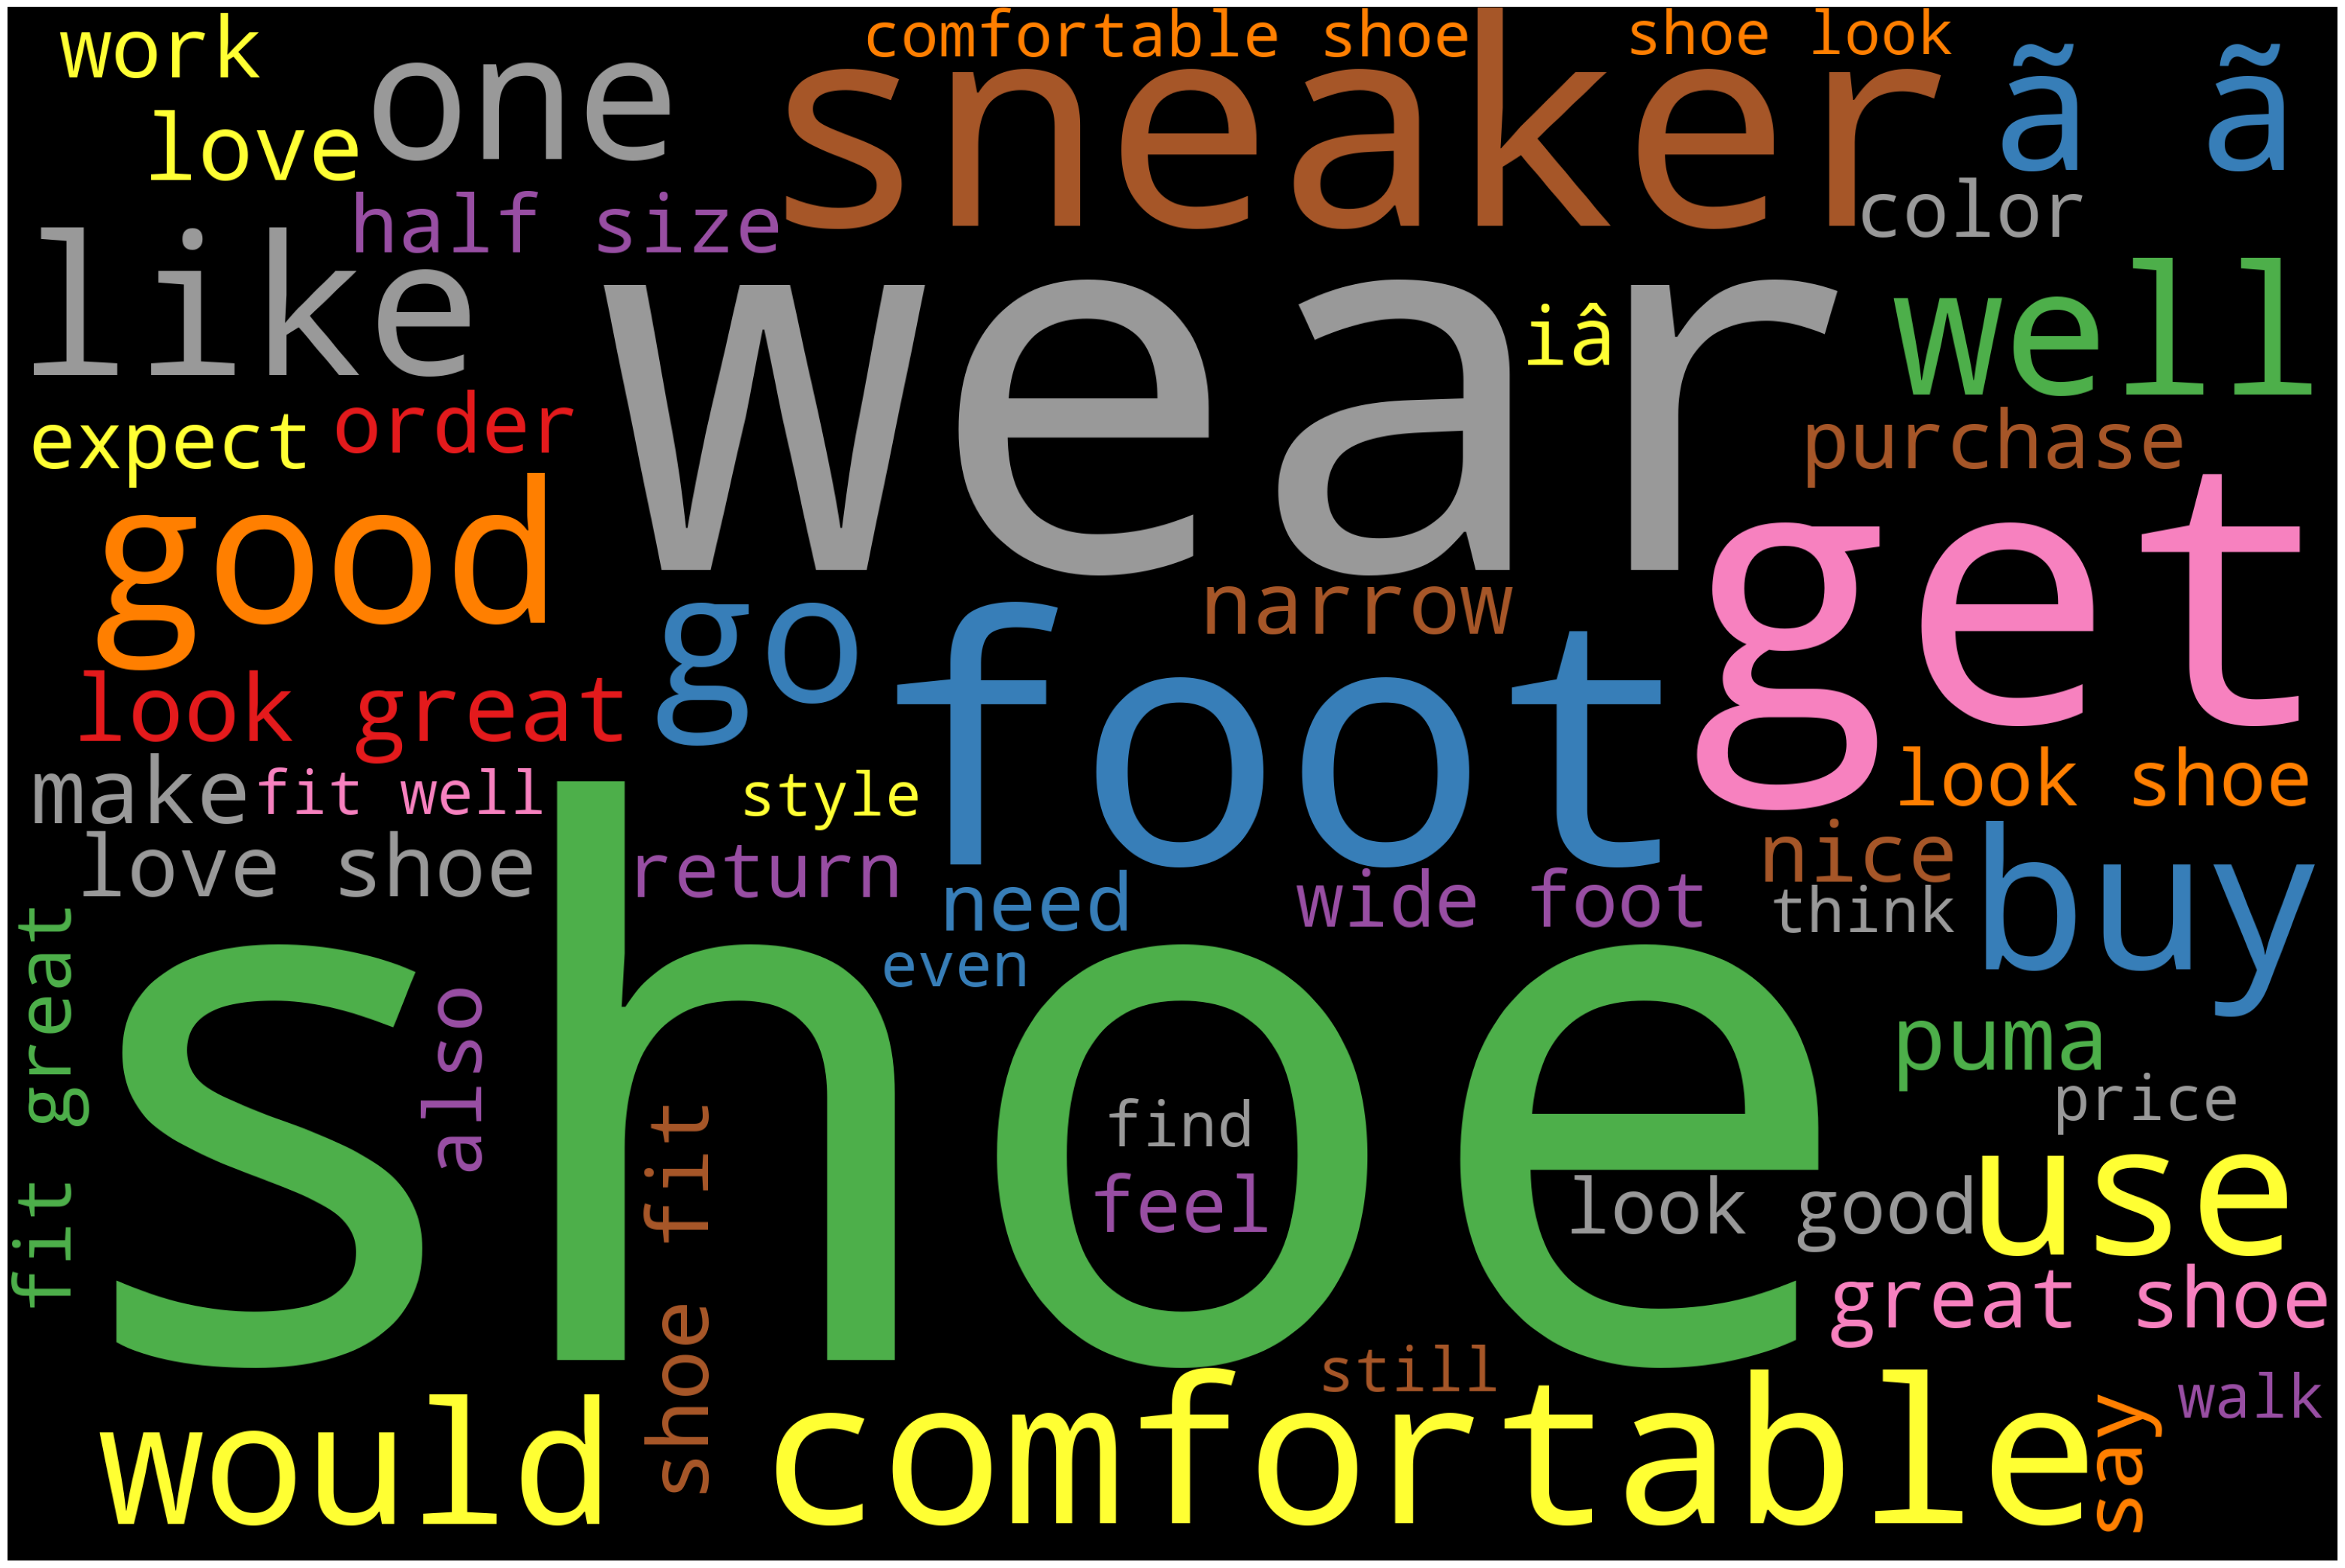

In [92]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

#STOPWORDS.add('pron')
#STOPWORDS.add('rt')
#STOPWORDS.add('yeah')

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=my_stop_words).generate(clean_reviews)
plot_cloud(wordcloud)

In [93]:
# Save image
wordcloud.to_file("puma_words.png")

### Text Pre-processing Techniques

In [98]:
#importing dataset using pandas
reviews=pd.read_csv('Reviews_on_PumaData.csv',encoding='Latin-1',index_col=0)

### Removing '@names'

In [99]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [103]:
reviews['Reviews']=reviews['Reviews'].apply(str)

In [104]:
# We are keeping cleaned reviews in a new column called 'Clean_Reviews'
reviews['Clean_Reviews'] = np.vectorize(remove_pattern)(reviews['Reviews'], "@[\w]*")
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Removing links (http | https)

In [109]:
cleaned_reviews = []

for index, row in reviews.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

reviews['Clean_Reviews'] = cleaned_reviews
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Removing tweets with empty text

In [112]:
reviews = reviews[reviews['Clean_Reviews']!='']
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Dropping duplicate rows

In [113]:
reviews.drop_duplicates(subset=['Clean_Reviews'], keep=False)
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Resetting index
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [114]:
reviews = reviews.reset_index(drop=True)
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Removing Punctuations, Numbers and Special characters
This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [115]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [116]:
reviews['Clean_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: clean_text(x))
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Function to remove emoji

In [117]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [118]:
reviews['Clean_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: remove_emoji(x))
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [120]:
reviews['tokenized_Reviews'] = reviews['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [121]:
reviews.drop(['tokenized_Reviews'],axis=1,inplace=True)

### Removing Stop words

In [122]:
import codecs
with codecs.open("C:/Users/Nishant/ExcelR Python Course/Assignment No.11 (Text MIning)/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [123]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [128]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in reviews.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
reviews['absolute_Clean_Reviews'] = cleaned_tweets
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

### Tokenize 'absolute_tidy_tweets'

In [129]:
tokenized_reviews = reviews['absolute_Clean_Reviews'].apply(lambda x: x.split())
tokenized_reviews.head(10)

0    [wear, womens, size, ordered, mens, size, fit, perfectly, super, comfortable, searched, high, low, nice, pair, shoes, color, style, liked, wasnt, finding, anything, womens, department, difficult, find, mens, find, one, stock, always, loved, pumas, going, continue, buying, nicely, made, craftsmanship, quality, imperfections, cheaplooking, junk, also, shoes, amazon, excuse, shoes, amazon, currently, unavailable, thank, puma, actually, shoes, advertise, available, purchase, point, needed, asap, work, showed, less, days, perfect, colors, job, requirements, nice, able, buy, work, shoes, actually, would, wear, even, work, instead, buy, nasty, embarrassing, shoes, make, feel, like, sort, matronly, dweeb, good, way, shoes, sick]
1                                                                                                                                                                                                                                                                       

### Converting words to Lemma

In [130]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_reviews = tokenized_reviews.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviews.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nishant\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [wear, woman, size, ordered, men, size, fit, perfectly, super, comfortable, searched, high, low, nice, pair, shoe, color, style, liked, wasnt, finding, anything, woman, department, difficult, find, men, find, one, stock, always, loved, puma, going, continue, buying, nicely, made, craftsmanship, quality, imperfection, cheaplooking, junk, also, shoe, amazon, excuse, shoe, amazon, currently, unavailable, thank, puma, actually, shoe, advertise, available, purchase, point, needed, asap, work, showed, le, day, perfect, color, job, requirement, nice, able, buy, work, shoe, actually, would, wear, even, work, instead, buy, nasty, embarrassing, shoe, make, feel, like, sort, matronly, dweeb, good, way, shoe, sick]
1                                                                                                                                                                                                                                                                                         

### Joining all tokens into sentences

In [131]:
for i, tokens in enumerate(tokenized_reviews):
    tokenized_reviews[i] = ' '.join(tokens)

reviews['absolute_Clean_Reviews'] = tokenized_reviews
reviews.head(10)

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [137]:
print(cv.get_feature_names()[109:200])

['14b', '14d', '14ee', '14suckst', '14w', '15', '150', '1500', '159', '15eeebut', '15k', '15min', '15yr', '15â', '16', '16only', '17', '170', '175', '1754', '1799', '17thhole', '18', '180', '1800', '18ã', '19', '190', '1955', '1960', '1962', '1969', '1970', '1970â', '197374', '1977', '1978', '1979', '1980si', '1982', '1983', '1984', '1985', '198586', '1986', '1990', '1991', '1994', '1999', '1st', '1â', '20', '200', '2000', '2000s', '2000â', '2008not', '200s', '2011', '2012', '2013', '2015', '20150', '2016', '2017', '2017of', '2019', '2020', '2021', '2022', '2022may', '2023', '2025', '2030', '20â', '210', '21st', '22', '23', '23grabbed', '23rd', '23â', '24', '245', '247', '25', '250', '255', '25min', '25months', '26']


C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [138]:
print(cv.get_feature_names()[:100])

['02', '05', '051121que', '10', '100', '1000', '1010', '10105', '10105the', '1012', '1015', '1016', '1020', '1025', '1025k', '105', '10511', '105115', '105but', '105d', '105little', '105s', '105these', '105us', '105w', '1060', '10but', '10d', '10got', '10i', '10ish', '10kday', '10not', '10sized', '10sother', '10th', '10uk', '10usd', '10w', '10yo', '10yr', '10â½', '11', '110', '11000', '11115', '1112', '1113', '112', '112517', '115', '11512', '11513', '115s', '115â', '11999', '11d', '11dont', '11even', '11hrs', '11s', '11slove', '11w', '11year', '11yr', '11â', '11â½', '12', '120', '1200', '121', '1213', '1242022', '124pm', '125', '12513', '1272023', '12cause', '12d', '12glad', '12hour', '12hr', '12i', '12ish', '12just', '12shoe', '12th', '12this', '12w', '13', '1300', '13000', '1315', '135', '139', '13a', '13b', '13the', '13these', '13was']


### TF-IDF Vectorizer

In [142]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(reviews))):
    review = re.sub('[^a-zA-Z]', ' ', reviews['absolute_Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/26387 [00:00<?, ?it/s]

In [143]:
corpus[5]

'deliveri fast shoe advertis comfort go purchas differ color'

In [144]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [145]:
X.shape

(26387, 5000)

In [146]:
tfidf_v.get_feature_names()[:10]

C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aber',
 'abl',
 'abl wear',
 'absolut',
 'absolut love',
 'absolut love puma',
 'absolut love shoe',
 'abus',
 'acabado',
 'accent']

In [147]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [148]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aber       abl  abl wear  absolut  absolut love  absolut love puma  \
0       0.0  0.091156       0.0      0.0           0.0                0.0   
1       0.0  0.000000       0.0      0.0           0.0                0.0   
2       0.0  0.000000       0.0      0.0           0.0                0.0   
3       0.0  0.000000       0.0      0.0           0.0                0.0   
4       0.0  0.000000       0.0      0.0           0.0                0.0   
...     ...       ...       ...      ...           ...                ...   
26382   0.0  0.000000       0.0      0.0           0.0                0.0   
26383   0.0  0.000000       0.0      0.0           0.0                0.0   
26384   0.0  0.000000       0.0      0.0           0.0                0.0   
26385   0.0  0.000000       0.0      0.0           0.0                0.0   
26386   0.0  0.000000       0.0      0.0           0.0                0.0   

       absolut love shoe  abus  acabado  accent  ...  yr old  zapatilla  \
0                    0.0   0.0      0.0     0.0  ...     0.0        0.0   
1                    0.0   0.0      0.0     0.0  ...     0.0        0.0   
2                    0.0   0.0      0.0     0.0  ...     0.0        0.0   
3                    0.0   0.0      0.0     0.0  ...     0.0        0.0   
4                    0.0   0.0      0.0     0.0  ...     0.0        0.0   
...                  ...   ...      ...     ...  ...     ...        ...   
26382                0.0   0.0      0.0     0.0  ...     0.0        0.0   
26383                0.0   0.0      0.0     0.0  ...     0.0        0.0   
26384                0.0   0.0      0.0     0.0  ...     0.0        0.0   
26385                0.0   0.0      0.0     0.0  ...     0.0        0.0   
26386                0.0   0.0      0.0     0.0  ...     0.0        0.0   

       zapato  zapato de  zapato muy  zapato muy modo  zapato son  zero  \
0         0.0        0.0         0.0              0.0         0.0   0.0   
1         0.0        0.0         0.0              0.0         0.0   0.0   
2         0.0        0.0         0.0              0.0         0.0   0.0   
3         0.0        0.0         0.0              0.0         0.0   0.0   
4         0.0        0.0         0.0              0.0         0.0   0.0   
...       ...        ...         ...              ...         ...   ...   
26382     0.0        0.0         0.0              0.0         0.0   0.0   
26383     0.0        0.0         0.0              0.0         0.0   0.0   
26384     0.0        0.0         0.0              0.0         0.0   0.0   
26385     0.0        0.0         0.0              0.0         0.0   0.0   
26386     0.0        0.0         0.0              0.0         0.0   0.0   

       zero support   zu  
0               0.0  0.0  
1               0.0  0.0  
2               0.0  0.0  
3               0.0  0.0  
4               0.0  0.0  
...             ...  ...  
26382           0.0  0.0  
26383           0.0  0.0  
26384           0.0  0.0  
26385           0.0  0.0  
26386           0.0  0.0  

[26387 rows x 5000 columns]

### Named Entity Recognition (NER)

In [149]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [150]:
one_block

'wear women size 7 order men size 55 fit perfectly super comfortable search high low nice pair shoe color style like be not find anything women department very difficult find men 55 find one stock always love puma going continue buy nicely make the craftsmanship quality imperfection cheaplooke junk also shoe amazon excuse 99 shoe amazon currently unavailable thank puma actually shoe advertise available purchase that point need asap work show less 2 day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way these shoe sick the toe area extremely narrowtight seem sized little small 5 pair puma shoe really well make still reason little tight usual return half size usual puma size buy black black brown sol order size 7 shoe puma shoe order gorgeous shoe 7 receive 7 least half inch long previous size 7 puma second pair vs original suede love only concern know buy second pair toe box 

In [151]:
for token in doc_block[:20]:
    print(token,token.pos_) 

wear VERB
women NOUN
size NOUN
7 NUM
order NOUN
men NOUN
size VERB
55 NUM
fit NOUN
perfectly ADV
super ADV
comfortable ADJ
search NOUN
high ADJ
low ADJ
nice ADJ
pair NOUN
shoe NOUN
color NOUN
style NOUN


### Filtering out only the nouns and verbs from the Text to Tokens

In [153]:
# Filtering the nouns and verbs only
nlp.max_length = 2136919
one_block=clean_reviews
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['pair', 'remember', 'comfortablei', 'suppose', 'know', 'change', 'cool', 'dude', 'walk', 'face', 'earth', 'delivery', 'shoe', 'advertise', 'go', 'purchase', 'color', 'get', 'w', 'work', 'love', 'feel', 'love', 'quality', 'size', 'shipping', 'wear', 'women', 'size', 'order', 'men', 'size', 'fit', 'search', 'pair', 'shoe', 'color', 'style', 'find', 'women', 'department', 'find', 'men', 'find', 'stock', 'love', 'going', 'buy', 'make', 'craftsmanship', 'quality', 'imperfection', 'cheaplooke', 'junk', 'shoe', 'thank', 'shoe', 'advertise', 'purchase', 'point', 'need', 'asap', 'work', 'show', 'day', 'color', 'job', 'requirement', 'buy', 'work', 'shoe', 'wear', 'work', 'buy', 'shoe', 'make', 'feel', 'sort', 'dweeb', 'way', 'shoe', 'sick', 'toe', 'area', 'seem', 'pair', 'shoe', 'make', 'reason', 'return', 'half', 'size', 'puma', 'size', 'buy', 'sol', 'order', 'size', 'shoe', 'shoe']


In [154]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0  shoe  14463
1  size   5367
2  look   5065
3  wear   4584
4  foot   3507
5  love   3435
6   buy   3270
7  pair   3208
8   get   2765
9   fit   2736

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

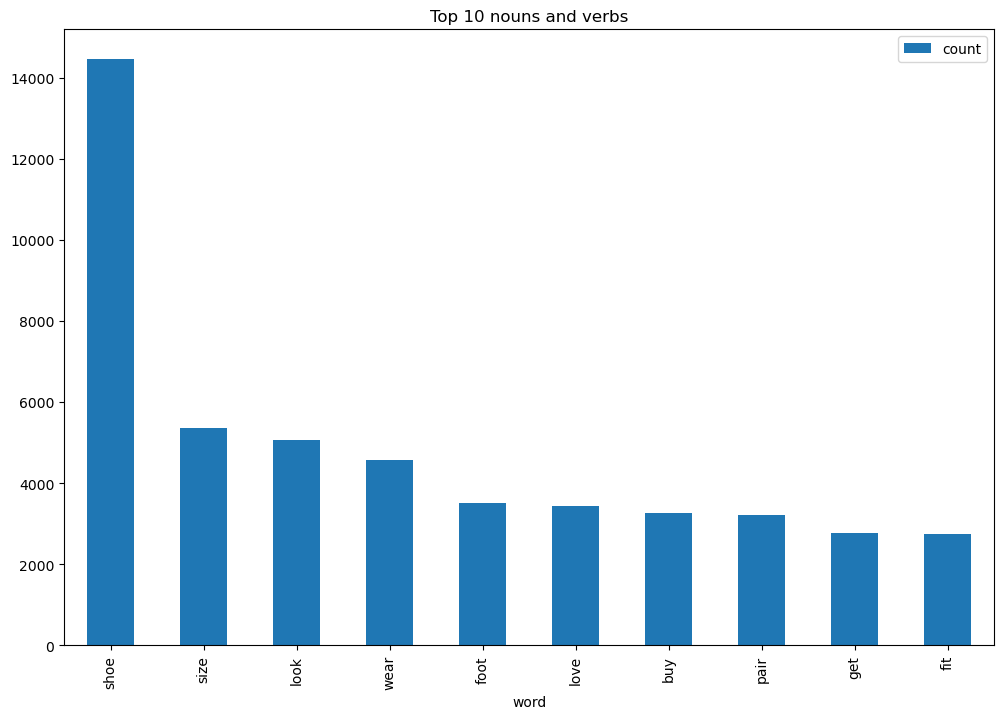

In [155]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

<h4>Observations:</h4>
The word shoe has high frequency among the others as its being used many times in thw tweets <br>
Because as we scarap the puma shoe product from amazon

### Feature Extraction

In [156]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(reviews['absolute_Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(reviews['absolute_Clean_Reviews'])

In [157]:
reviews

Reviews  \
0      \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                     \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of t

### Fetch sentiments

In [158]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [159]:
sentiments_using_SIA = reviews.absolute_Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

absolute_Clean_Reviews
pos                   24673
neg                    1714

In [160]:
reviews.Clean_Reviews[5]

'delivery fast shoes advertised comfortable going purchase different colors'

In [161]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(reviews.absolute_Clean_Reviews[5])

{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}

In [162]:
df=pd.DataFrame()
df['Reviews'] = reviews.absolute_Clean_Reviews
df['scores'] = reviews.Clean_Reviews.apply(lambda review: sid.polarity_scores(review))
df.head()

Reviews  \
0  wear woman size ordered men size fit perfectly super comfortable searched high low nice pair shoe color style liked wasnt finding anything woman department difficult find men find one stock always loved puma going continue buying nicely made craftsmanship quality imperfection cheaplooking junk also shoe amazon excuse shoe amazon currently unavailable thank puma actually shoe advertise available purchase point needed asap work showed le day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way shoe sick   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                  toe area extremely narrowtight seem sized little small pair puma shoe really well made still reason little tighter usual returning half size usual puma size bought black black brown sol   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ordered size shoe puma shoe ordered gorgeous shoe received least half inch longer previous size puma   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                          second pair v original suede love concern knew buy second pair toe box narrow wearing several time broken nicely add white shoe lace black blue pair give nice contrast love shoe   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   year since ive pair theyve always cool dont remember comfortablei suppose nobody know clyde named changed google one coolest dude ever walked face earth   

                                                           scores  
0  {'neg': 0.107, 'neu': 0.552, 'pos': 0.341, 'compound': 0.9818}  
1    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.3384}  
2    {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6124}  
3   {'neg': 0.07, 'neu': 0.562, 'pos': 0.369, 'compound': 0.9231}  
4    {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}

In [163]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Reviews  \
0  wear woman size ordered men size fit perfectly super comfortable searched high low nice pair shoe color style liked wasnt finding anything woman department difficult find men find one stock always loved puma going continue buying nicely made craftsmanship quality imperfection cheaplooking junk also shoe amazon excuse shoe amazon currently unavailable thank puma actually shoe advertise available purchase point needed asap work showed le day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way shoe sick   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                  toe area extremely narrowtight seem sized little small pair puma shoe really well made still reason little tighter usual returning half size usual puma size bought black black brown sol   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ordered size shoe puma shoe ordered gorgeous shoe received least half inch longer previous size puma   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                          second pair v original suede love concern knew buy second pair toe box narrow wearing several time broken nicely add white shoe lace black blue pair give nice contrast love shoe   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   year since ive pair theyve always cool dont remember comfortablei suppose nobody know clyde named changed google one coolest dude ever walked face earth   

                                                           scores  compound  
0  {'neg': 0.107, 'neu': 0.552, 'pos': 0.341, 'compound': 0.9818}    0.9818  
1    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.3384}    0.3384  
2    {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6124}    0.6124  
3   {'neg': 0.07, 'neu': 0.562, 'pos': 0.369, 'compound': 0.9231}    0.9231  
4    {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}    0.3182

In [164]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Reviews  \
0      wear woman size ordered men size fit perfectly super comfortable searched high low nice pair shoe color style liked wasnt finding anything woman department difficult find men find one stock always loved puma going continue buying nicely made craftsmanship quality imperfection cheaplooking junk also shoe amazon excuse shoe amazon currently unavailable thank puma actually shoe advertise available purchase point needed asap work showed le day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way shoe sick   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                      toe area extremely narrowtight seem sized little small pair puma shoe really well made still reason little tighter usual returning half size usual puma size bought black black brown sol   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ordered size shoe puma shoe ordered gorgeous shoe received least half inch longer previous size puma   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                              second pair v original suede love concern knew buy second pair toe box narrow wearing several time broken nicely add white shoe lace black blue pair give nice contrast love shoe   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       year since ive pair theyve always cool dont remember comfortablei suppose nobody know clyde named changed google one coolest dude ever walked face earth   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ...   
26382                                                                                                                                                                                                                        

In [165]:
reviews.describe()

Reviews Clean_Reviews tokenized__Reviews absolute_Clean_Reviews
count    26387         26387              26387                  26387
unique   11900         11318              11318                  11246
top        nan   comfortable        comfortable            comfortable
freq       145           170                170                    170

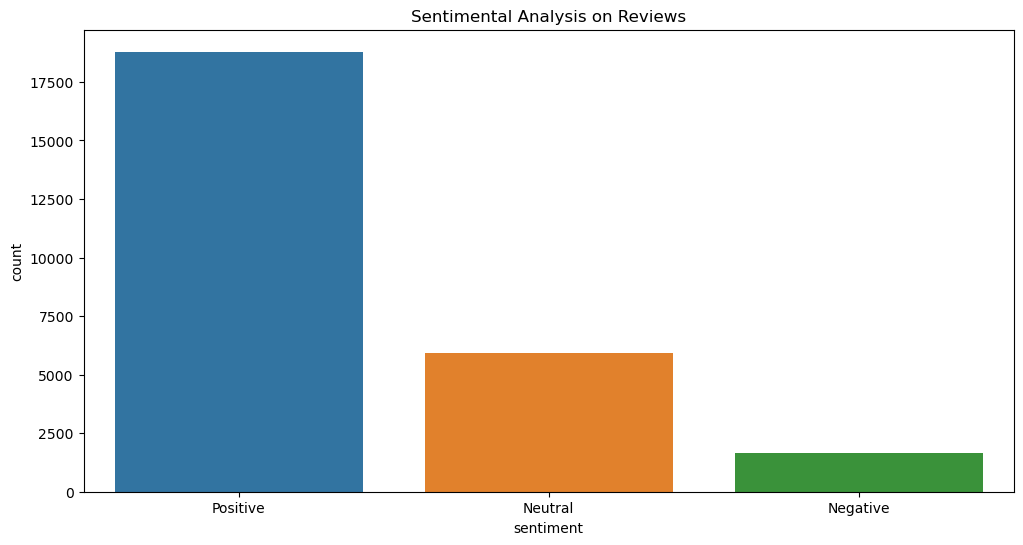

In [170]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)
plt.title('Sentimental Analysis on Reviews')
plt.show()

<h4>Observations:</h4>
The Positive tweets sentiments is very than compared to others<br>
The Puma mens shoes has high postitive reviews which the product is good to use <br>
The Negative sentiments has lowest numbers of reviews 

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


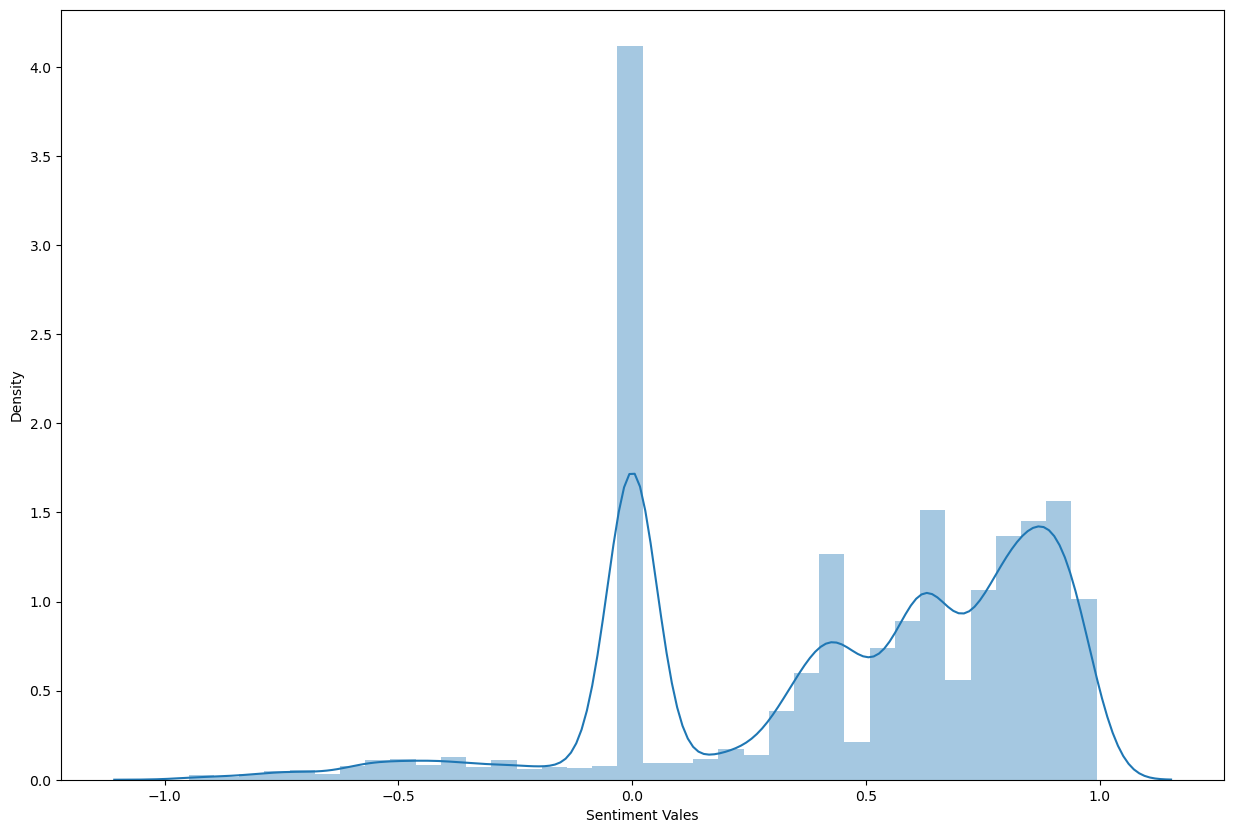

In [171]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])
plt.xlabel('Sentiment Vales')
plt.show()

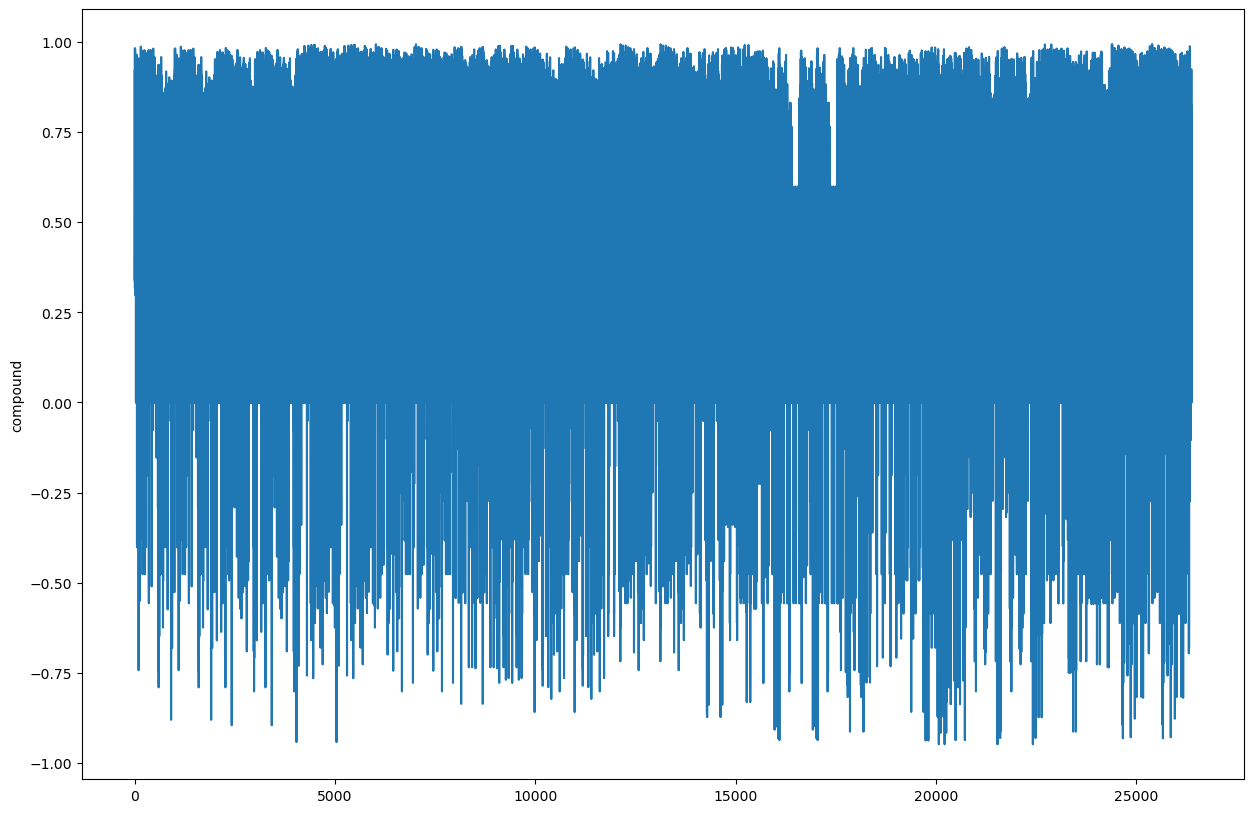

In [172]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x=df.index,data=df)
plt.show()

In [173]:
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split(" ")))
df[['Reviews','word_count']].head()

Reviews  \
0  wear woman size ordered men size fit perfectly super comfortable searched high low nice pair shoe color style liked wasnt finding anything woman department difficult find men find one stock always loved puma going continue buying nicely made craftsmanship quality imperfection cheaplooking junk also shoe amazon excuse shoe amazon currently unavailable thank puma actually shoe advertise available purchase point needed asap work showed le day perfect color job requirement nice able buy work shoe actually would wear even work instead buy nasty embarrassing shoe make feel like sort matronly dweeb good way shoe sick   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                  toe area extremely narrowtight seem sized little small pair puma shoe really well made still reason little tighter usual returning half size usual puma size bought black black brown sol   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ordered size shoe puma shoe ordered gorgeous shoe received least half inch longer previous size puma   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                          second pair v original suede love concern knew buy second pair toe box narrow wearing several time broken nicely add white shoe lace black blue pair give nice contrast love shoe   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   year since ive pair theyve always cool dont remember comfortablei suppose nobody know clyde named changed google one coolest dude ever walked face earth   

   word_count  
0          94  
1          30  
2          16  
3          31  
4          24

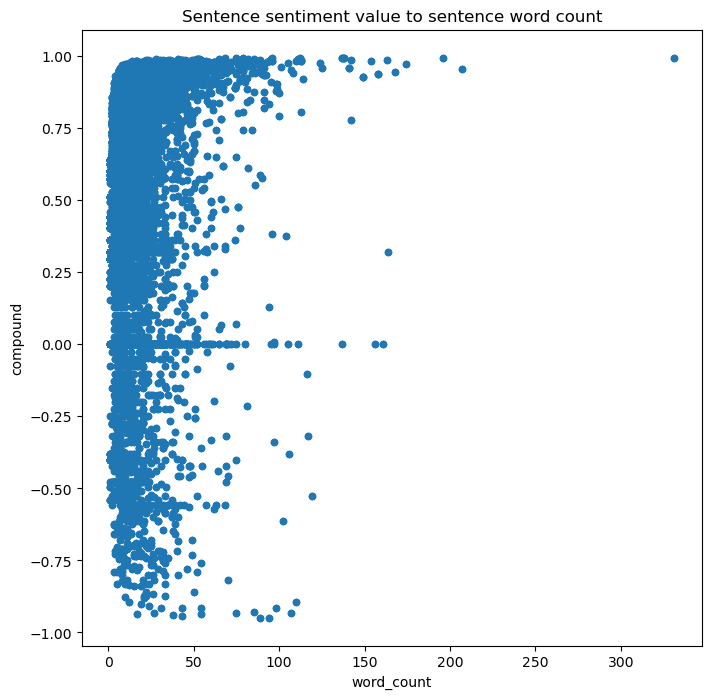

In [174]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')
plt.show()

### Most common words in Positive Reviews 

In [175]:
reviews['sentiment'] = sentiments_using_SIA
reviews.head()

Reviews  \
0  \nI wear a women's size 7, so I ordered a men's size 5.5 and they fit perfectly.  Super comfortable.  I searched high and low for a nice pair of shoes in the color and style I liked, and I wasn't finding anything in the women's department. Very, very difficult to find a men's 5.5, and then if you do, to find one in stock.  Always loved Pumas and going to continue buying them because these are very nicely made.  The craftsmanship is just quality, with no imperfections or cheap-looking junk on them.  Also, why are all the shoes on Amazon, or excuse me, 99% of the shoes on Amazon, currently unavailable? Thank you, Puma for actually having the shoes that you advertise available for purchase.  That is, after all, the point.  I needed them asap for work, and they showed up in less than 2 day...   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nThe toe area is extremely narrow/tight and these seem to be sized a little too small. I have had 5 pairs of Puma shoes and they are all really well made (I still have all of them) but these are for some reason just a little tighter than usual. I am returning for a half size up from my usual Puma size. I bought the black on black with brown soles.\n   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \nI have ordered a size 7 shoe in all my puma shoes . I Ordered this gorgeous shoe in a 7. I received a 7 but it's at least half an inch longer than my previous size 7 pumas.\n   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       \nSecond pair of these vs the original suedes. Love them. Only concern and knew this buy the second pair was the toe box being narrow.  After wearing several times they have broken in nicely. I did add the white shoes laces to both the black and blue pair to give a nice contrast. Love the shoes.\n   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \nIt's been about 40 years since I've had a pair of these.  They've always been cool, but I don't remember them being this comfortable.I suppose nobody knows who Clyde is any more, so the named changed.  Google it.  One of the coolest dudes who

In [176]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

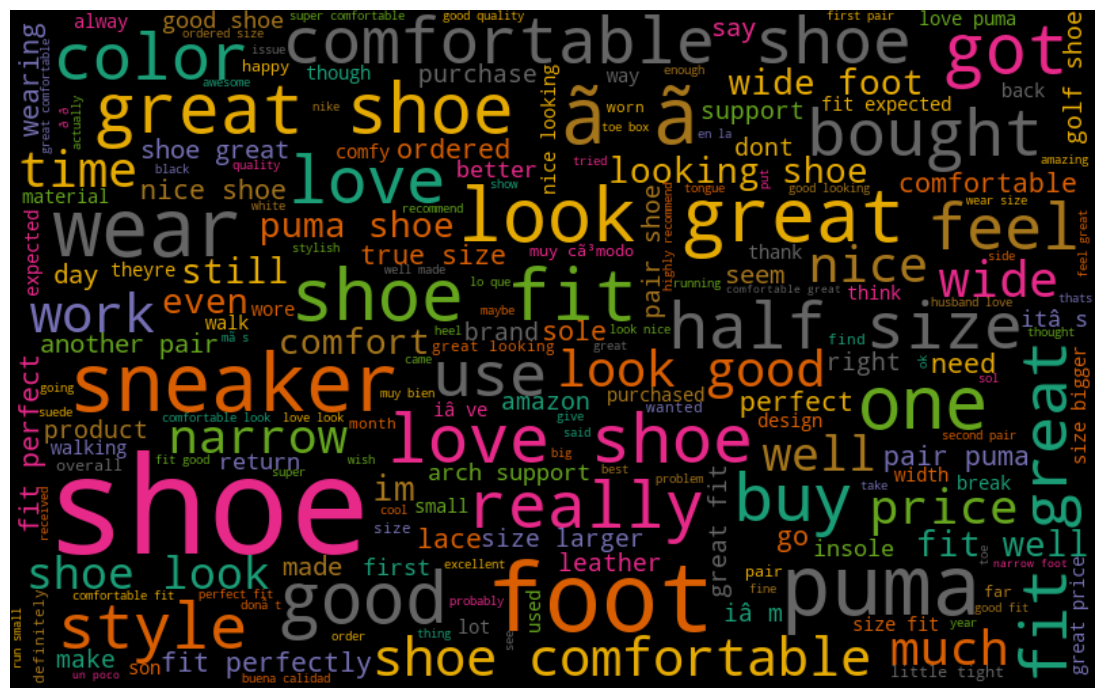

In [178]:
all_words = ' '.join([text for text in reviews['absolute_Clean_Reviews'][reviews.sentiment == 'pos']])
generate_wordcloud(all_words)

<h4>Observations:</h4>
The most common words are used in positive reviews are shoe,love,puma,good,great,comfortable,etc.<br>

### Most common words in Negative Reviews 

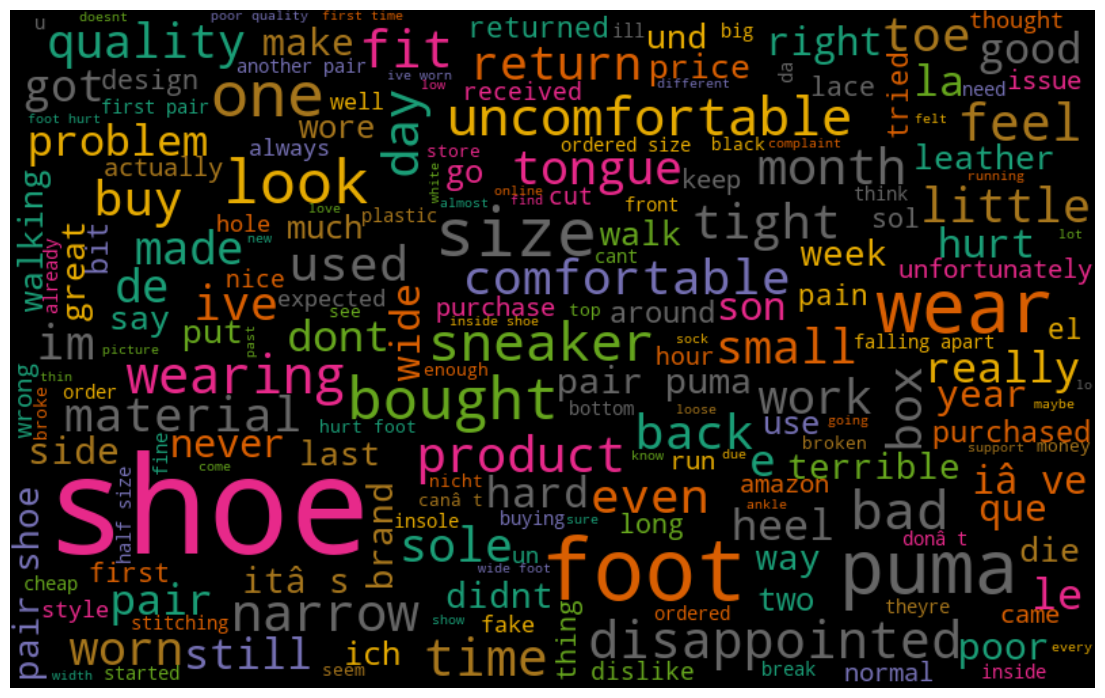

In [180]:
all_words = ' '.join([text for text in reviews['absolute_Clean_Reviews'][reviews.sentiment == 'neg']])
generate_wordcloud(all_words)

<h4>Observations:</h4>
The most common words are used in negative reviews are shoe,foot,bad,uncomfortable,small,etc.<br>

<h4>Insights:</h4>
Firstly, we extract reviews from Amazon on mens puma shoe using the method called web scrapping <br>
For it we have use NLP techniques from deep learing <br>
First, we cleaned the reviews using various tokenizers. We deleted unwanted data from the dataset <br>
Then using Named Entity Recognition (NER) we extract noun and verbs from the dataset for sentimental analysis <br>
We got the word <b> shoe </b> which was occured in number of times in the reviews <br>
Using the sentimental analysis we got the words the from positive as well as negative reviews <br>
We visualize it with WorldCloud for the analysis <br>
The product has high positive sentiment reviews,by which we can assume that the product is good to use.